In [ ]:
# Import necessary libraries for data handling, visualization, and deep learning with TensorFlow/Keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the CIFAR-10 dataset from TensorFlow, splitting into training and testing sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 41s 0us/step


In [ ]:
# Normalize pixel values to the range [0, 1] for better model performance
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Define the class names corresponding to the CIFAR-10 dataset labels
class_names = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
# Define the Convolutional Neural Network (CNN) model architecture
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model with loss function, optimizer, and evaluation metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model on the training data with validation on test data for 10 epochs
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3393 - loss: 1.7702 - val_accuracy: 0.5332 - val_loss: 1.2993
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5640 - loss: 1.2276 - val_accuracy: 0.6153 - val_loss: 1.0881
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6302 - loss: 1.0447 - val_accuracy: 0.6634 - val_loss: 0.9691
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6762 - loss: 0.9341 - val_accuracy: 0.6728 - val_loss: 0.9528
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7031 - loss: 0.8487 - val_accuracy: 0.6837 - val_loss: 0.9125
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7216 - loss: 0.7849 - val_accuracy: 0.6938 - val_loss: 0.8757
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7407 - loss: 0.7375 - val_accuracy: 0.6935 - val_loss: 0.8970
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7592 - loss: 0.6877 -

In [ ]:
# Evaluate the trained model on the test dataset and print the test accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7143 - loss: 0.8639
Test Accuracy: 0.7074999809265137


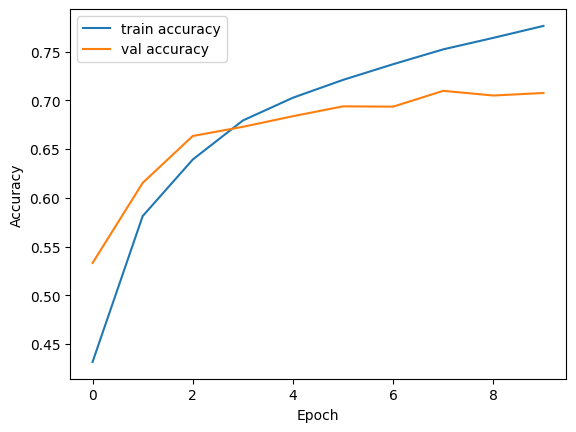

In [ ]:
# Plot the training and validation accuracy over epochs to visualize model performance
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()